<a href="https://colab.research.google.com/github/balqozz/PCVK_2024/blob/main/Week5_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tugas Praktikum

## 1. Buat Gamma Correction

 Gamma Correction pada citra 
--------------------------------
Masukkan nilai Gamma: 3


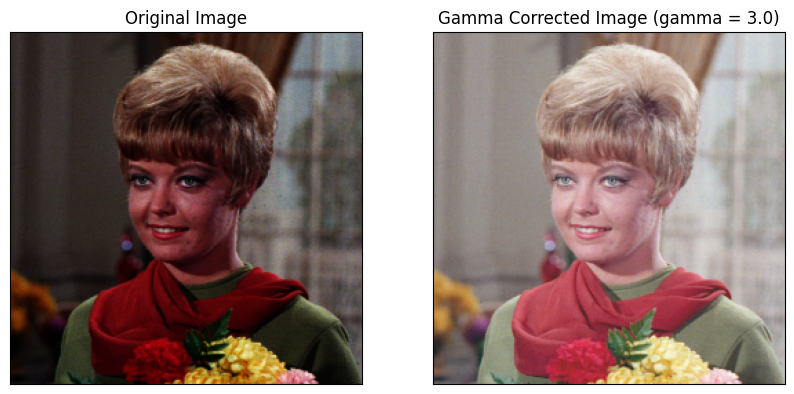

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

print(' Gamma Correction pada citra ')
print('--------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number!')
    exit()

image = cv.imread('/content/drive/MyDrive/Images/female.tiff')

if image is None:
    print("Gambar tidak ditemukan, pastikan path gambar benar.")
    exit()

adjusted_image = gamma_correction(image, gamma)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title(f'Gamma Corrected Image (gamma = {gamma})')
plt.imshow(cv.cvtColor(adjusted_image, cv.COLOR_BGR2RGB))

plt.xticks([])
plt.yticks([])

plt.show()

## 2. Buat Simulasi Image Depth

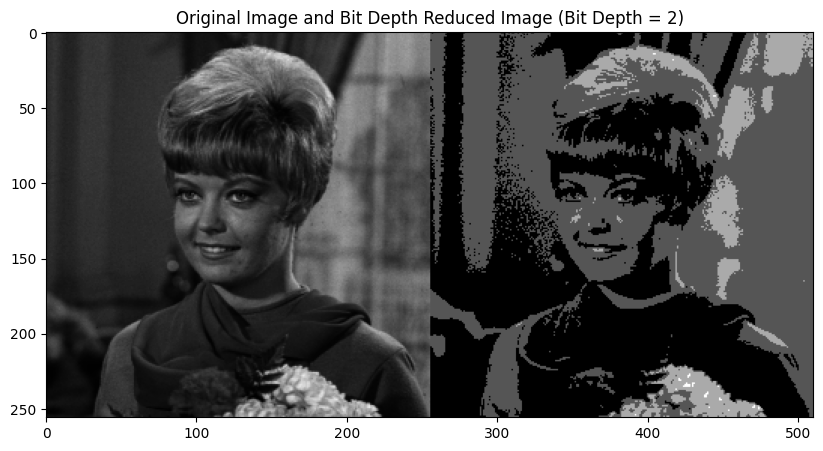

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.round(original / level) * level

# Gabungkan kedua gambar secara horizontal
combined_image = np.hstack((original, depth_image))

# Tampilkan gambar yang sudah digabungkan
plt.figure(figsize=(10, 5))
plt.imshow(combined_image, cmap='gray')
plt.title('Original Image and Bit Depth Reduced Image (Bit Depth = 2)')

# Set batas sumbu X hingga 500 untuk fokus pada bagian tertentu
plt.xlim([0, 510])

# Menampilkan plot
plt.show()


## 3. Buat modul Average Denoising

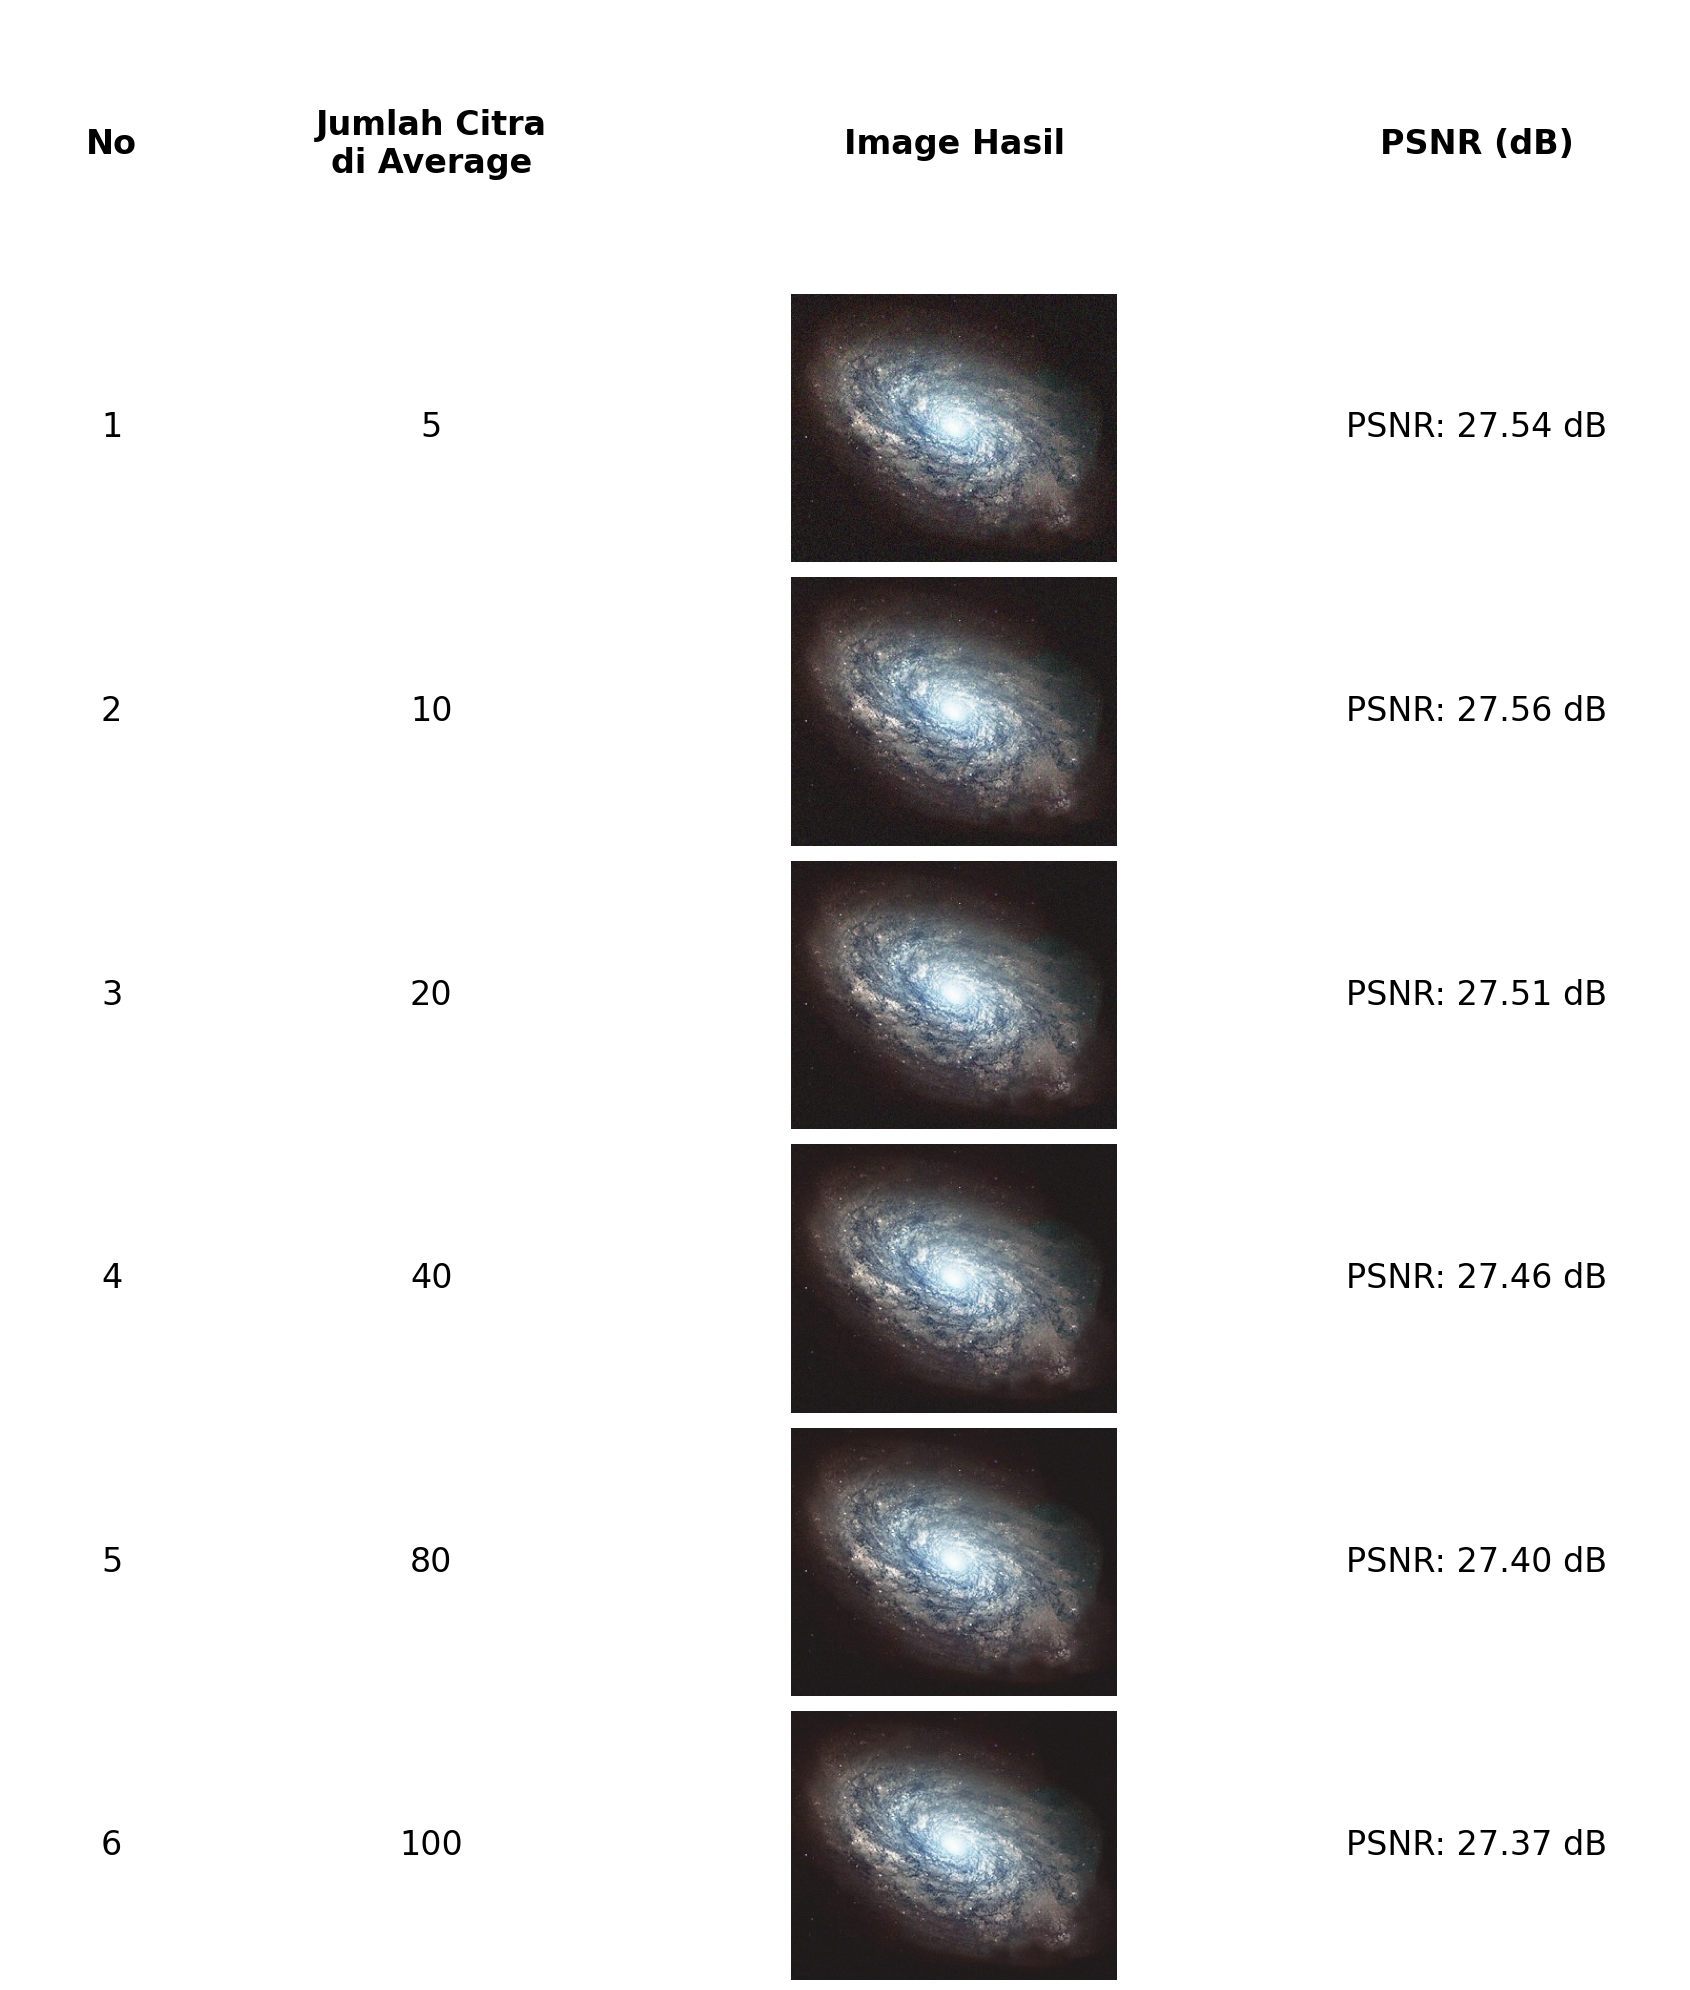

In [10]:
import cv2 as cv
import numpy as np
import glob
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

# Function to calculate PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:  # Means no noise is present in the image
        return float('inf')
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))
    return psnr

# Load original image (the clean reference)
original_image = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
# Define how many noisy images to average (e.g., 5, 10, 20, 40, 80, 100)
noisy_counts = [5, 10, 20, 40, 80, 100]

# Prepare the table for storing PSNR values
psnr_results = []
average_images = []

# Load and process images based on different counts
for count in noisy_counts:
    # Load 'count' number of noisy images
    cv_img = []
    for img in glob.glob('/content/drive/MyDrive/Images/noises/*jpg')[:count]:
        n = cv.imread(img)
        if n is not None:
            cv_img.append(n)

    # Average the noisy images
    average_image = np.mean(cv_img, axis=0).astype(np.uint8)
    average_images.append(average_image)

    # Calculate PSNR for the averaged image
    psnr_value = calculate_psnr(original_image, average_image)
    psnr_results.append(psnr_value)

# Plot the table with images and PSNR values
fig = plt.figure(figsize=(17, 20))
gs = GridSpec(7, 4, width_ratios=[0.5, 1, 1.5, 1])  # Adjust width ratios here

# Add table headers
ax1 = plt.subplot(gs[0, 0])
ax1.text(0.5, 0.5, "No", horizontalalignment='center', verticalalignment='center', fontsize=24, weight='bold')
ax1.axis('off')

ax2 = plt.subplot(gs[0, 1])
ax2.text(0.5, 0.5, "Jumlah Citra\ndi Average", horizontalalignment='center', verticalalignment='center', fontsize=24, weight='bold')
ax2.axis('off')

ax3 = plt.subplot(gs[0, 2])
ax3.text(0.5, 0.5, "Image Hasil", horizontalalignment='center', verticalalignment='center', fontsize=24, weight='bold')
ax3.axis('off')

ax4 = plt.subplot(gs[0, 3])
ax4.text(0.5, 0.5, "PSNR (dB)", horizontalalignment='center', verticalalignment='center', fontsize=24, weight='bold')
ax4.axis('off')

# Display each row with number, noisy average image, and PSNR value
for i, count in enumerate(noisy_counts):
    # Column 1: No
    ax = plt.subplot(gs[i+1, 0])
    ax.text(0.5, 0.5, str(i+1), horizontalalignment='center', verticalalignment='center', fontsize=24)
    ax.axis('off')

    # Column 2: Jumlah Citra di Average
    ax = plt.subplot(gs[i+1, 1])
    ax.text(0.5, 0.5, str(count), horizontalalignment='center', verticalalignment='center', fontsize=24)
    ax.axis('off')

    # Column 3: Image Hasil
    ax = plt.subplot(gs[i+1, 2])
    ax.imshow(average_images[i], cmap=None)
    ax.axis('off')

    # Column 4: PSNR (dB)
    ax = plt.subplot(gs[i+1, 3])
    ax.text(0.5, 0.5, f'PSNR: {psnr_results[i]:.2f} dB', horizontalalignment='center', verticalalignment='center', fontsize=24)
    ax.axis('off')

plt.tight_layout()
plt.show()

**Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.**

1. **Peningkatan Kualitas**: Semakin banyak citra noisy yang di-average, PSNR meningkat, artinya kualitas gambar hasil denoising semakin mendekati gambar asli.
   
2. **Efektivitas**: Teknik average denoising efektif dalam mengurangi noise gaussian, menghasilkan gambar yang lebih bersih seiring bertambahnya jumlah citra.

3. **Diminishing Returns**: Setelah mencapai jumlah citra tertentu (80-100), peningkatan kualitas menjadi tidak signifikan meski menambah citra lebih banyak.

4. **Keseimbangan Kualitas dan Waktu**: Meskipun menambah citra meningkatkan kualitas, hal ini juga meningkatkan waktu dan kompleksitas pemrosesan, sehingga perlu keseimbangan antara kualitas dan efisiensi.

## 4. Buat image masking untuk KTP

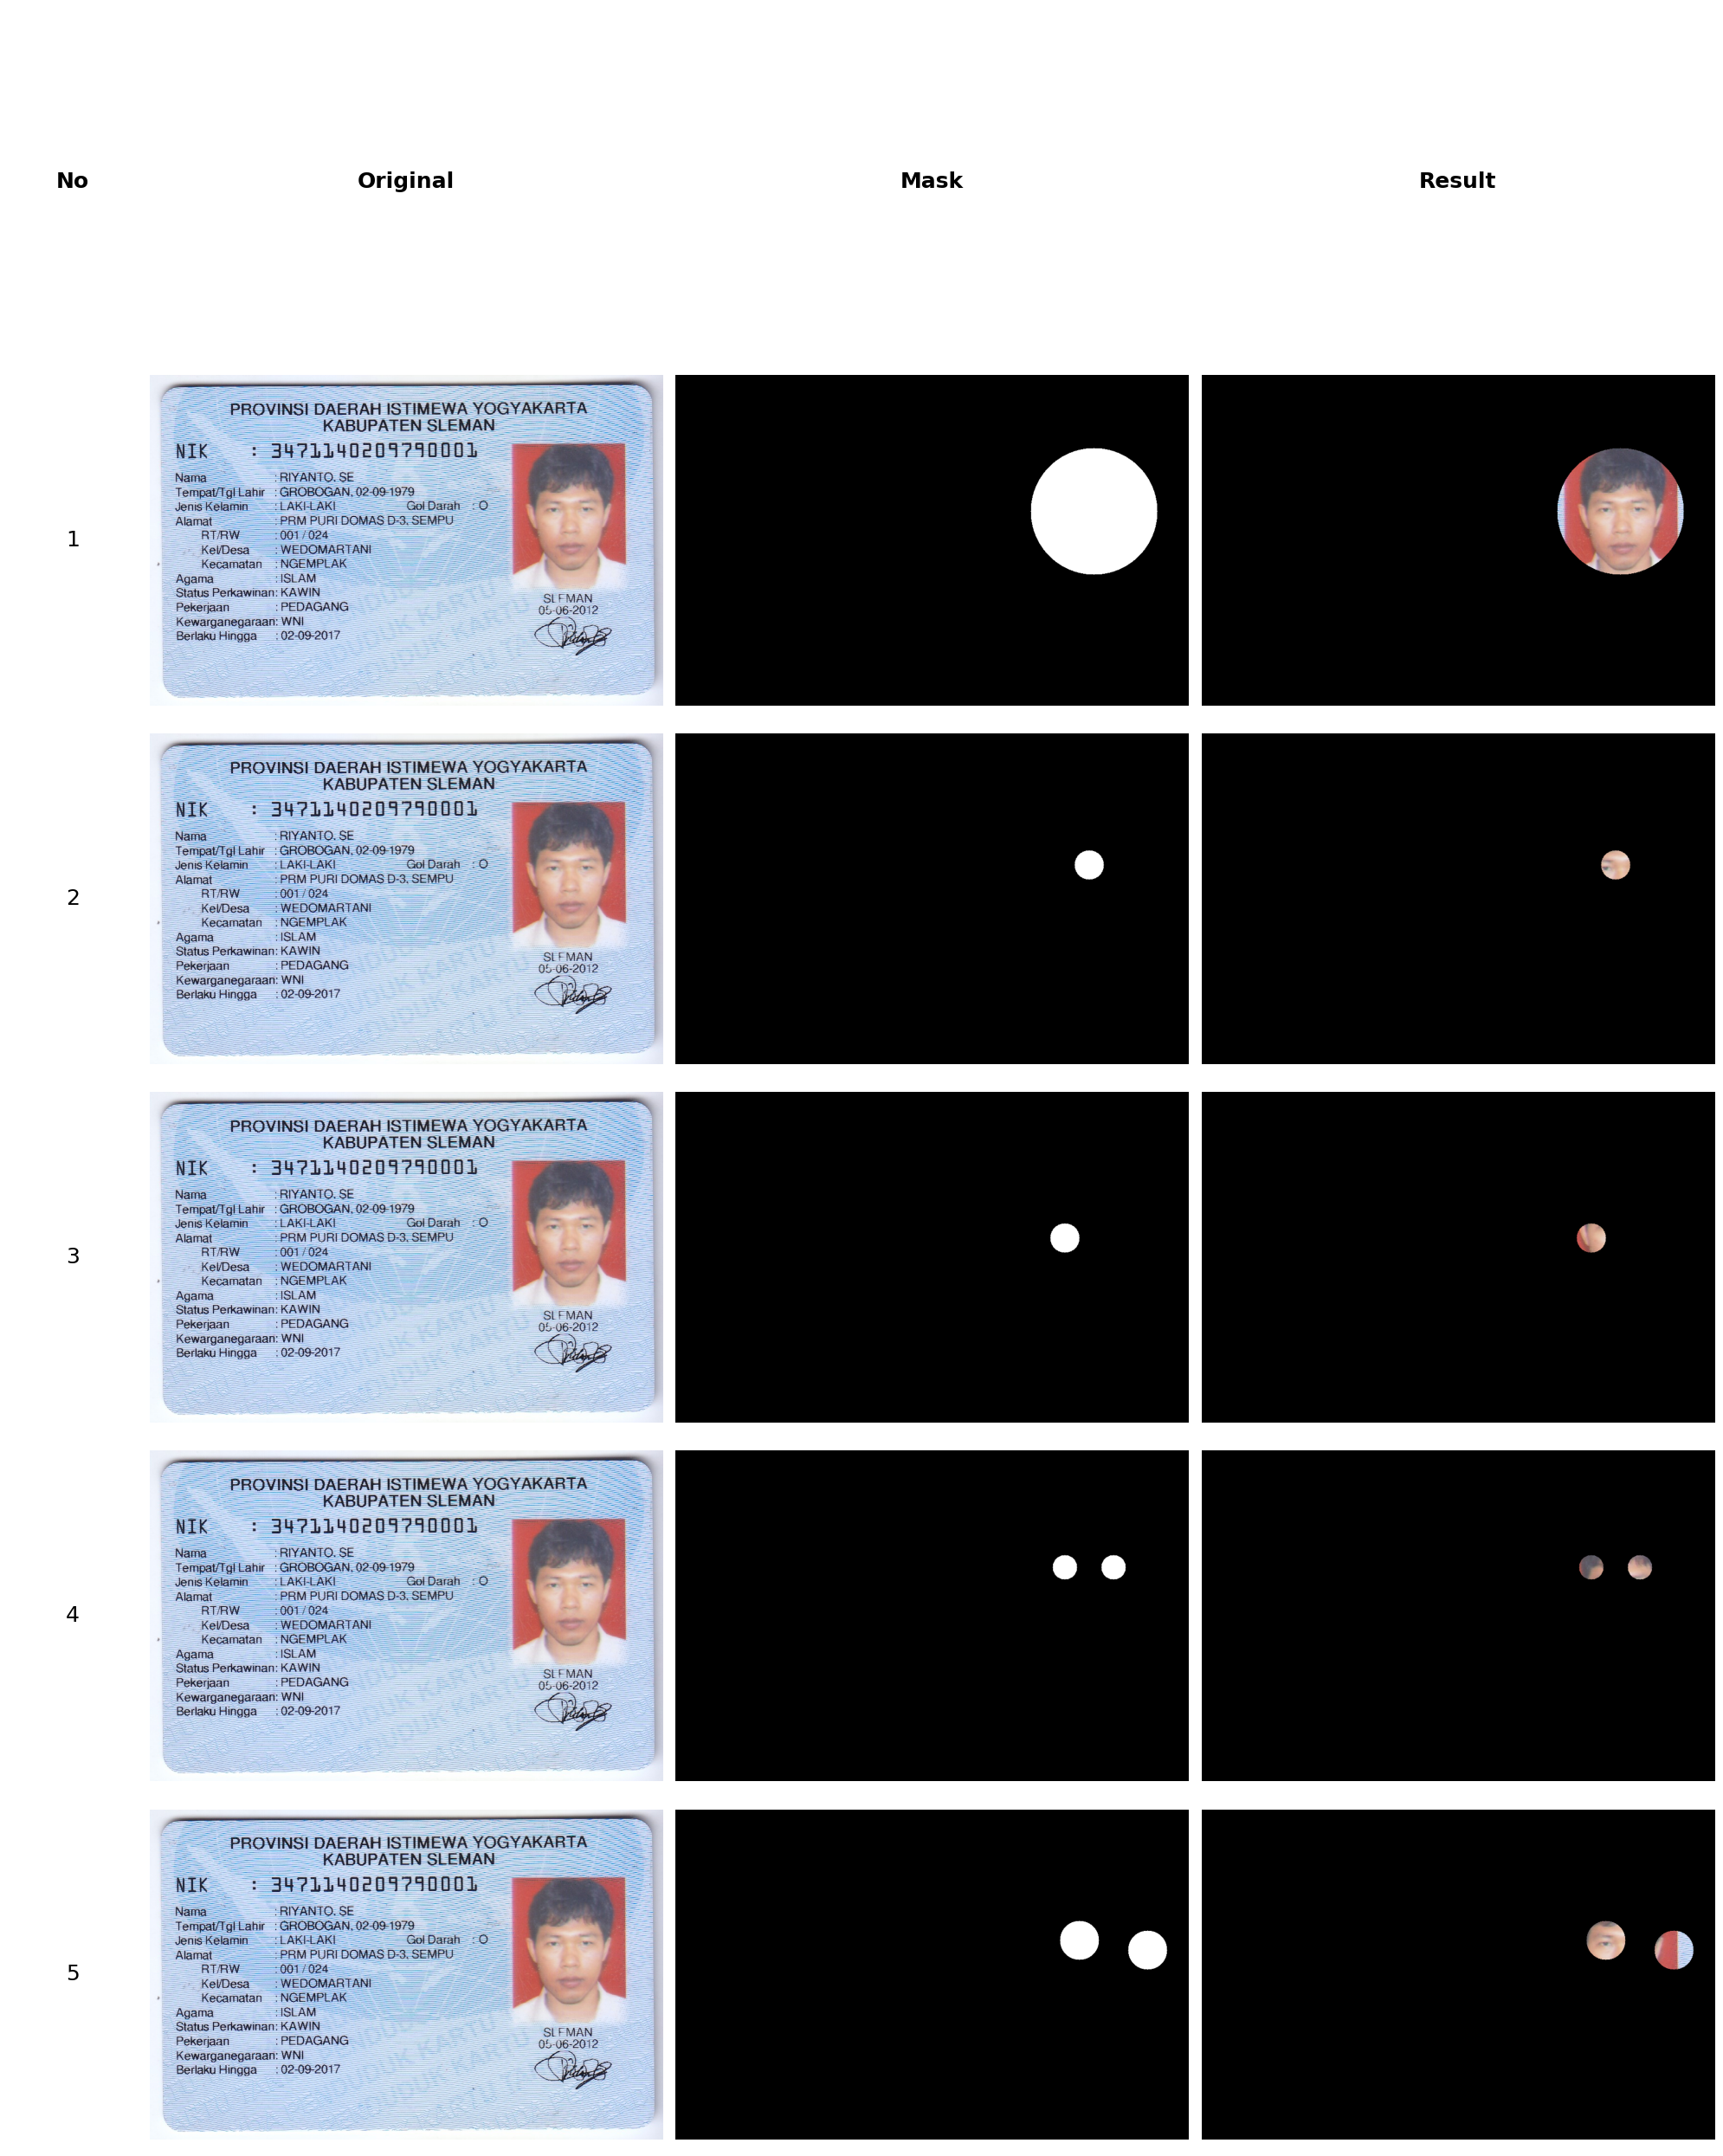

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

# Load the image (replace with your actual image path)
image = cv2.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png')

# Check if the image is loaded correctly
if image is None:
    print("Error loading image. Please check the file path.")
else:
    # Function to create a circle mask using the equation of a circle
    def create_circle_mask(height, width, center, radius):
        mask = np.zeros((height, width), dtype="uint8")
        h, k = center
        for y in range(height):
            for x in range(width):
                if (x - h)**2 + (y - k)**2 <= radius**2:
                    mask[y, x] = 255
        return mask

    # Create different masks (using the equation of a circle)
    mask_1 = create_circle_mask(image.shape[0], image.shape[1], (860, 280), 130)  # Large circle
    masked_image_1 = cv2.bitwise_and(image, image, mask=mask_1)

    mask_2 = create_circle_mask(image.shape[0], image.shape[1], (850, 270), 30)  # Smaller circle
    masked_image_2 = cv2.bitwise_and(image, image, mask=mask_2)

    mask_3 = create_circle_mask(image.shape[0], image.shape[1], (800, 300), 30)  # Tiny circle
    masked_image_3 = cv2.bitwise_and(image, image, mask=mask_3)

    mask_4 = create_circle_mask(image.shape[0], image.shape[1], (800, 240), 25)  # Two small circles
    mask_4 += create_circle_mask(image.shape[0], image.shape[1], (900, 240), 25)
    masked_image_4 = cv2.bitwise_and(image, image, mask=mask_4)

    mask_5 = create_circle_mask(image.shape[0], image.shape[1], (830, 270), 40)  # Two very small circles
    mask_5 += create_circle_mask(image.shape[0], image.shape[1], (970, 290), 40)
    masked_image_5 = cv2.bitwise_and(image, image, mask=mask_5)

    # Convert the original image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create figure for plotting
    fig = plt.figure(figsize=(20, 25))
    gs = GridSpec(6, 4, width_ratios=[0.5, 2, 2, 2])

    # Add table headers
    ax1 = plt.subplot(gs[0, 0])
    ax1.text(0.5, 0.5, "No", horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
    ax1.axis('off')

    ax2 = plt.subplot(gs[0, 1])
    ax2.text(0.5, 0.5, "Original", horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
    ax2.axis('off')

    ax3 = plt.subplot(gs[0, 2])
    ax3.text(0.5, 0.5, "Mask", horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
    ax3.axis('off')

    ax4 = plt.subplot(gs[0, 3])
    ax4.text(0.5, 0.5, "Result", horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
    ax4.axis('off')

    # Display rows with the original image, masks, and results
    masks = [mask_1, mask_2, mask_3, mask_4, mask_5]
    masked_images = [masked_image_1, masked_image_2, masked_image_3, masked_image_4, masked_image_5]

    for i, (mask, masked_image) in enumerate(zip(masks, masked_images)):
        # Column 1: No (number)
        ax = plt.subplot(gs[i+1, 0])
        ax.text(0.5, 0.5, str(i+1), horizontalalignment='center', verticalalignment='center', fontsize=18)
        ax.axis('off')

        # Column 2: Original Image
        ax = plt.subplot(gs[i+1, 1])
        ax.imshow(image_rgb)
        ax.axis('off')

        # Column 3: Mask
        ax = plt.subplot(gs[i+1, 2])
        ax.imshow(mask, cmap='gray')
        ax.axis('off')

        # Column 4: Result (masked image)
        masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        ax = plt.subplot(gs[i+1, 3])
        ax.imshow(masked_image_rgb)
        ax.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

## 5. percobaan menggunakan operator lain

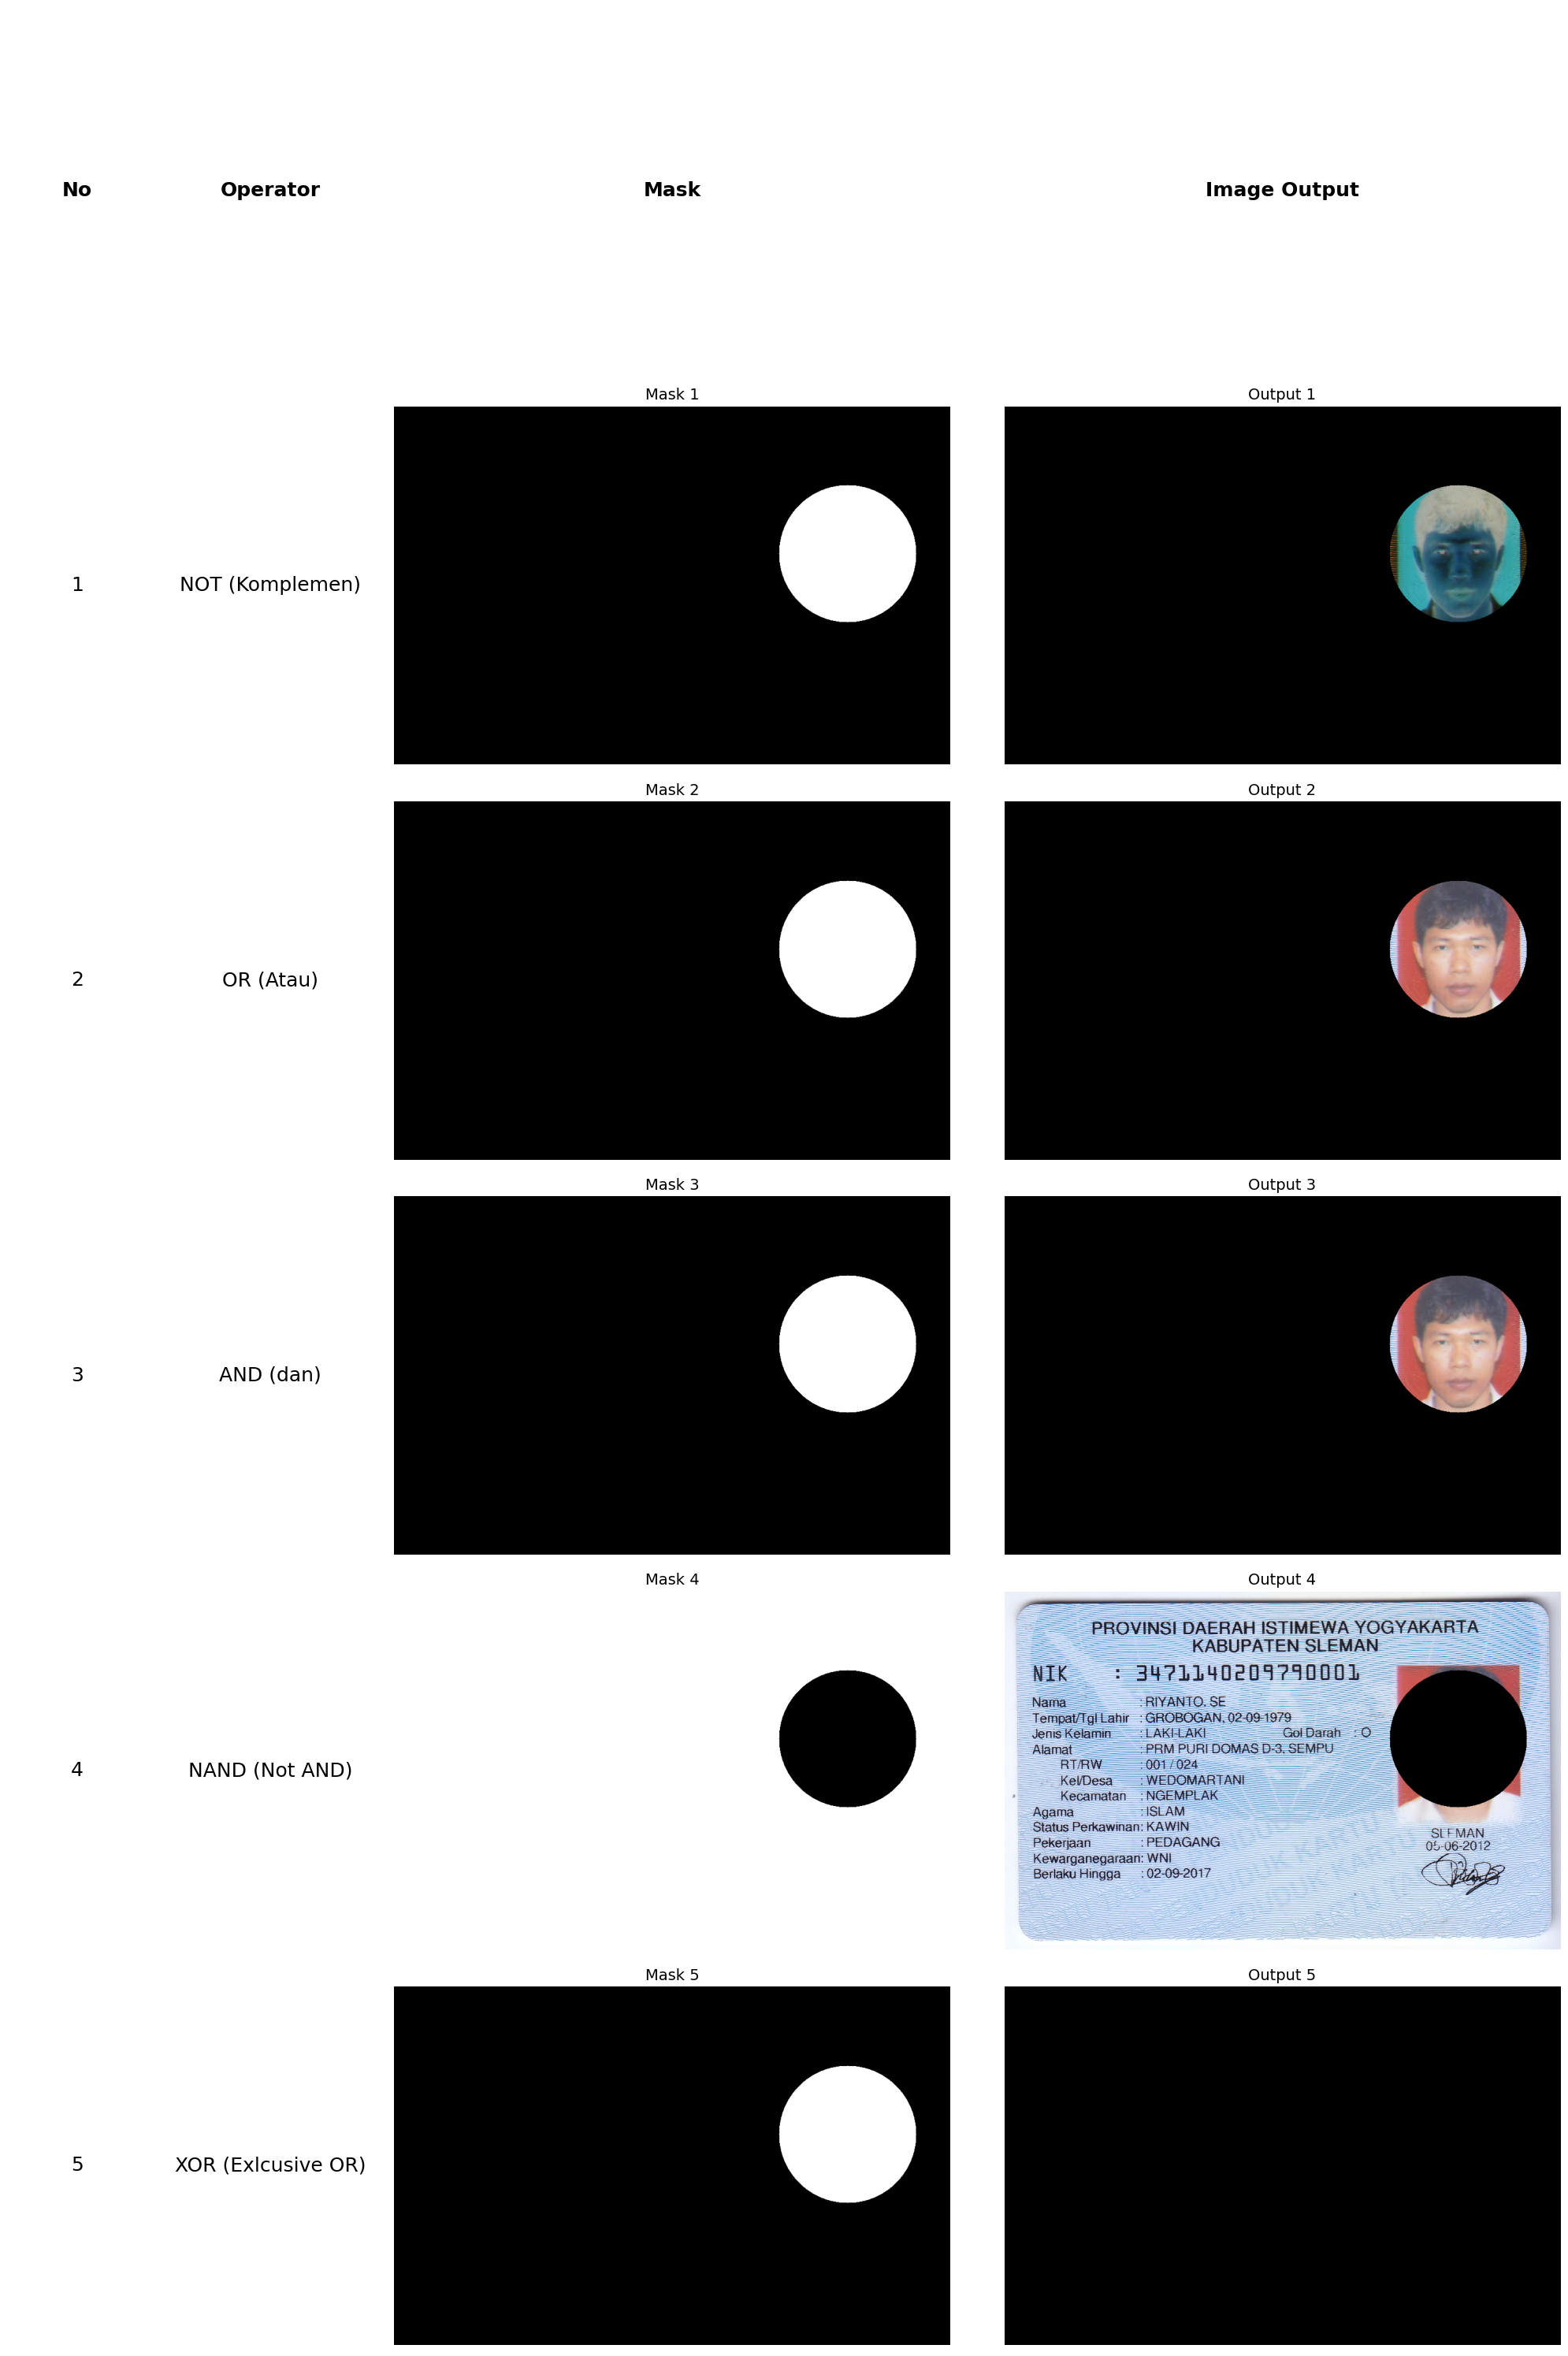

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

# Fungsi untuk membuat masker lingkaran yang dioptimalkan
def create_circle_mask(height, width, center, radius):
    Y, X = np.ogrid[:height, :width]
    dist_from_center = (X - center[0])**2 + (Y - center[1])**2
    mask = dist_from_center <= radius**2
    return (mask * 255).astype("uint8")

# Load the image (ganti dengan path gambar Anda)
image = cv2.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png')

# Cek apakah gambar berhasil dimuat
if image is None:
    print("Error loading image. Please check the file path.")
else:
    # Membuat beberapa masker
    center_point = (860, 280)  # Ganti sesuai kebutuhan
    radius_size = 130

    # Masker 1: NOT
    mask_1 = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    masked_image_1 = cv2.bitwise_not(image, mask=mask_1)

    # Masker 2: OR (menggunakan masker yang sama)
    mask_2 = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    masked_image_2 = cv2.bitwise_or(image, image, mask=mask_2)

    # Masker 3: AND (menggunakan masker yang sama)
    mask_3 = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    masked_image_3 = cv2.bitwise_and(image, image, mask=mask_3)

    # Masker 4: NAND
    # Membuat dua masker untuk operasi AND kemudian NOT
    mask4_a = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    mask4_b = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)

    # Operasi AND antara mask4_a dan mask4_b
    and_mask4 = cv2.bitwise_and(mask4_a, mask4_b)

    # Operasi NOT pada hasil AND untuk mendapatkan NAND
    nand_mask4 = cv2.bitwise_not(and_mask4)

    # Menerapkan masker NAND ke gambar asli
    masked_image_4 = cv2.bitwise_and(image, image, mask=nand_mask4)

    # Masker 5: XOR (menggunakan masker yang sama)
    mask_5 = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    masked_image_5 = cv2.bitwise_xor(image, image, mask=mask_5)

    # Convert the original image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Membuat figure untuk plotting
    fig = plt.figure(figsize=(20, 30))
    gs = GridSpec(6, 4, width_ratios=[0.5, 0.5, 2, 2])

    # Menambahkan header tabel
    headers = ["No", "Operator", "Mask", "Image Output"]
    for i, header in enumerate(headers):
        ax = plt.subplot(gs[0, i])
        ax.text(0.5, 0.5, header, horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
        ax.axis('off')

    # Daftar operator dan masker
    operators = ["NOT (Komplemen)", "OR (Atau)", "AND (dan)", "NAND (Not AND)", "XOR (Exlcusive OR)"]
    masks = [mask_1, mask_2, mask_3, nand_mask4, mask_5]
    masked_images = [masked_image_1, masked_image_2, masked_image_3, masked_image_4, masked_image_5]

    for i, (operator, mask, masked_image) in enumerate(zip(operators, masks, masked_images)):
        row = i + 1

        # Kolom 1: No (nomor)
        ax = plt.subplot(gs[row, 0])
        ax.text(0.5, 0.5, str(i + 1), horizontalalignment='center', verticalalignment='center', fontsize=18)
        ax.axis('off')

        # Kolom 2: Operator
        ax = plt.subplot(gs[row, 1])
        ax.text(0.5, 0.5, operator, horizontalalignment='center', verticalalignment='center', fontsize=18)
        ax.axis('off')

        # Kolom 3: Mask
        ax = plt.subplot(gs[row, 2])
        ax.imshow(mask, cmap='gray')
        ax.set_title(f'Mask {i + 1}', fontsize=14)
        ax.axis('off')

        # Kolom 4: Hasil Operasi
        masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        ax = plt.subplot(gs[row, 3])
        ax.imshow(masked_image_rgb)
        ax.set_title(f'Output {i + 1}', fontsize=14)
        ax.axis('off')

    # Menampilkan plot
    plt.tight_layout()
    plt.show()

### Hasil Analisa
---

**1) Penerapan Koreksi Gamma pada Gambar**

**Tujuan dan Metode:**
Koreksi gamma bertujuan untuk menyesuaikan tingkat kecerahan gambar, terutama pada area yang terlalu terang atau gelap. Proses ini dilakukan dengan menerapkan rumus tertentu pada setiap piksel untuk mengatur kontras. Nilai gamma yang dimasukkan oleh pengguna menentukan seberapa terang atau gelap hasil akhirnya.

**Hasil Operasi:**
Gambar asli dan gambar hasil koreksi gamma ditampilkan secara berdampingan. Nilai gamma lebih dari 1 akan membuat gambar lebih gelap, sementara nilai di bawah 1 akan mencerahkan gambar. Koreksi gamma yang tepat dapat meningkatkan detail di area yang sebelumnya kurang terlihat.

**Kesimpulan:**
Koreksi gamma memungkinkan penyesuaian kecerahan dan kontras gambar dengan baik. Pengguna dapat mencoba berbagai nilai gamma untuk memahami efeknya terhadap gambar.

---

**2) Penerapan Pengurangan Kedalaman Bit pada Gambar Grayscale**

**Tujuan dan Metode:**
Pengurangan kedalaman bit bertujuan untuk mengurangi ukuran file atau menyederhanakan pemrosesan gambar. Dengan mengurangi jumlah bit, gambar dibagi menjadi tingkatan intensitas yang lebih sedikit, menghasilkan efek seperti "posterization."

**Hasil Operasi:**
Perbandingan antara gambar asli dengan gambar yang dikurangi kedalamannya menunjukkan bahwa semakin rendah kedalaman bit, semakin banyak detail yang hilang. Dalam kasus pengurangan hingga 2 bit, hanya 4 tingkat intensitas yang tersedia.

**Kesimpulan:**
Pengurangan kedalaman bit menyebabkan kehilangan informasi gambar, tetapi berguna dalam aplikasi tertentu seperti penyimpanan yang lebih efisien atau pemrosesan gambar yang tidak memerlukan detail tinggi.

---

**3) Pengurangan Noise dengan Metode Averaging dan PSNR**

**Tujuan dan Metode:**
Tujuan metode ini adalah mengurangi noise pada gambar dengan menghitung rata-rata beberapa gambar berisik dan menilai kualitas hasilnya menggunakan PSNR (Peak Signal-to-Noise Ratio).

**Hasil Operasi:**
Rata-rata dari berbagai jumlah gambar berisik menunjukkan bahwa semakin banyak gambar yang diaverage, semakin baik hasil yang diperoleh. PSNR juga meningkat seiring dengan bertambahnya jumlah gambar.

**Kesimpulan:**
Menggunakan metode averaging efektif untuk mengurangi noise. PSNR memberikan ukuran yang jelas tentang peningkatan kualitas gambar setelah pengurangan noise.

---

**4) Penggunaan Masker Lingkaran dalam Pemrosesan Gambar**

**Tujuan dan Metode:**
Kode ini menggunakan masker berbentuk lingkaran untuk mengisolasi bagian spesifik dari gambar dengan operasi logika AND. Fungsi ini membantu memusatkan perhatian pada area tertentu dalam gambar.

**Hasil Operasi:**
Beberapa masker lingkaran diterapkan dengan ukuran yang berbeda untuk fokus pada area tertentu, mulai dari lingkaran besar hingga kecil. Ini memungkinkan isolasi detail tertentu dalam gambar.

**Kesimpulan:**
Masker lingkaran efektif untuk menyoroti bagian tertentu dari gambar dan dapat digunakan untuk analisis lebih lanjut dalam pemrosesan gambar yang lebih kompleks.

---

**5) Penerapan Operasi Logika pada Gambar dengan Masker Lingkaran**

**Tujuan dan Metode:**
Berbagai operasi logika (NOT, OR, AND, NAND, XOR) diterapkan pada gambar menggunakan masker berbentuk lingkaran untuk menghasilkan berbagai efek visual.

**Hasil Operasi:**
Hasil menunjukkan bagaimana setiap operasi logika mempengaruhi gambar, dengan setiap operasi menghasilkan efek yang berbeda seperti membalikkan piksel, menggabungkan, atau mengisolasi bagian gambar.

**Kesimpulan:**
Operasi logika ini berguna untuk segmentasi dan analisis gambar, dan dapat menghasilkan efek visual yang unik tergantung pada kebutuhan pemrosesan.